<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sentiment-Analyse-der-Entscheidungsgründe" data-toc-modified-id="Sentiment-Analyse-der-Entscheidungsgründe-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sentiment Analyse der Entscheidungsgründe</a></span><ul class="toc-item"><li><span><a href="#Datenvorbereitung" data-toc-modified-id="Datenvorbereitung-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Datenvorbereitung</a></span></li><li><span><a href="#Sentiment-Analyse" data-toc-modified-id="Sentiment-Analyse-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sentiment Analyse</a></span></li><li><span><a href="#Visualisierung" data-toc-modified-id="Visualisierung-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualisierung</a></span><ul class="toc-item"><li><span><a href="#Alle-Studenten" data-toc-modified-id="Alle-Studenten-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Alle Studenten</a></span></li><li><span><a href="#MINT-Studenten" data-toc-modified-id="MINT-Studenten-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>MINT-Studenten</a></span></li><li><span><a href="#Nicht-MINT-Studenten" data-toc-modified-id="Nicht-MINT-Studenten-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Nicht MINT-Studenten</a></span></li></ul></li></ul></li><li><span><a href="#Sentiment-Analyse-der-Verbesserungsvorschläge" data-toc-modified-id="Sentiment-Analyse-der-Verbesserungsvorschläge-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sentiment Analyse der Verbesserungsvorschläge</a></span><ul class="toc-item"><li><span><a href="#Datenvorbereitung" data-toc-modified-id="Datenvorbereitung-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Datenvorbereitung</a></span></li><li><span><a href="#Sentiment-Analyse" data-toc-modified-id="Sentiment-Analyse-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sentiment Analyse</a></span></li><li><span><a href="#Visualisierung" data-toc-modified-id="Visualisierung-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Visualisierung</a></span><ul class="toc-item"><li><span><a href="#Alle-Studenten" data-toc-modified-id="Alle-Studenten-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Alle Studenten</a></span></li><li><span><a href="#MINT-Studenten" data-toc-modified-id="MINT-Studenten-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>MINT-Studenten</a></span></li><li><span><a href="#Nicht-MINT-Studenten" data-toc-modified-id="Nicht-MINT-Studenten-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Nicht MINT-Studenten</a></span></li></ul></li></ul></li></ul></div>

Hilfsfunktionen & Einstellungen

In [2]:
# for pretty printing
import pprint as pp

# IPython (Jupyter) setting: 
# Print out every value instead of just "last_expr" (default)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Sentiment Analyse der Entscheidungsgründe

## Datenvorbereitung

In [3]:
import sqlite3
import pandas as pd
import os.path

dbPath = "database/bachelor_umfrage.db"

def get_sentiment_reason_data(table_name="sentiment"):
    df = pd.DataFrame()
    if os.path.isfile(dbPath):
        conn = sqlite3.connect(dbPath)
        sql = "SELECT MINTFach, Gründe FROM " + table_name
        sql += " WHERE Gründe IS NOT NULL"
        df = pd.read_sql_query(sql, conn)
    else:
        print("Datenbank oder Tabelle konnte nicht gefunden werden.")
    return df

reason_df = get_sentiment_reason_data(table_name="sentiment")
reason_df.sample(5)

,MINTFach,Gründe
342,ja,Ich habe mich für einen Ingenieurs Studiengang...
191,nein,Weil Mathe blöd ist. Nein.
456,nein,Da ich in der Schule immer ziemlich schlecht i...
6,ja,Einschlagen neuer Richtungen. Vom Betriebswirt...
452,ja,- Interesse an Naturwissenschaften und Mathema...


## Sentiment Analyse

In [4]:
from textblob_de import TextBlobDE

def get_sentiment_polarity(text):
    blob = TextBlobDE(text)

    for sentence in blob.sentences:
        return sentence.sentiment.polarity

In [5]:
polarity_list = []

for i, row in reason_df.iterrows():
    polarity = get_sentiment_polarity(row["Gründe"])
    polarity_list.append(polarity)
    
reason_df["polarity"] = polarity_list

In [6]:
def label_polarity (row):
    if row['polarity'] > 0.5 :
        return 'very positive'
    elif row['polarity'] < 0.5 and row['polarity'] > 0 :
        return 'positive'
    elif row['polarity'] > -0.5 and row['polarity'] < 0 :
        return 'negative'
    elif row['polarity'] < -0.5 :
        return 'very negative'
    else:
        return 'neutral'

reason_df['sentiment'] = reason_df.apply(label_polarity, axis=1)
reason_df.sample(5)

,MINTFach,Gründe,polarity,sentiment
345,ja,Informatik hat mich einfach sehr interessiert.,0.850000,very positive
436,ja,Faszination für Logik und das Lösen von Proble...,0.000000,neutral
168,ja,Einfach aus Interesse an dem Beruf..,0.700000,very positive
58,ja,"Praxisbezug während des Studiums, sehr gute Be...",0.666667,very positive
319,nein,In der Schule hatte ich immer Probleme in den ...,1.000000,very positive


Negativster & Positivster Sentiment

In [7]:
reason_df[reason_df.polarity == reason_df.polarity.max()].sample(5)
reason_df[reason_df.polarity == reason_df.polarity.min()].sample(5)

,MINTFach,Gründe,polarity,sentiment
453,nein,Ich wollte und will gerne aktiv etwas mit Mens...,1.0,very positive
387,nein,Schon seit der ersten Klasse hatte ich in Math...,1.0,very positive
337,ja,ich habe mich schon immer für Naturwissenschaf...,1.0,very positive
327,ja,"Gute Berufschancen, Beruf, der immerwieder Neu...",1.0,very positive
176,ja,In meinem ersten Studoum hat mich besonders de...,1.0,very positive


,MINTFach,Gründe,polarity,sentiment
155,nein,Da ich keinerlei Talent für naturwissenschaftl...,-1.0,very negative
17,ja,"Erststudium Geisteswissenschaften, zwar mit Be...",-1.0,very negative
191,nein,Weil Mathe blöd ist. Nein.,-1.0,very negative
344,ja,Ich habe bereits in sehr vielen verschiedenen ...,-1.0,very negative
219,nein,"Kein Interesse in den Fächern, war auch schlec...",-1.0,very negative


## Visualisierung

### Alle Studenten

In [8]:
#calculate average
polarity_sum = reason_df["polarity"].sum()
length = len(reason_df.index)
average = polarity_sum / length
average

0.2530820105820106

sentiment
negative          19
neutral          265
positive          26
very negative     27
very positive    167
Name: sentiment, dtype: int64

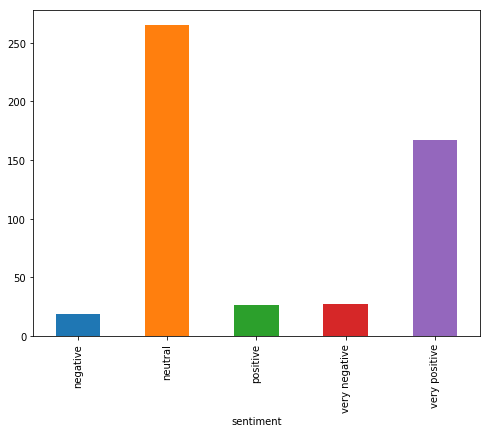

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
reason_df.groupby("sentiment")["sentiment"].count().plot.bar(ylim=0);
reason_df.groupby("sentiment")["sentiment"].count()

### MINT-Studenten

In [11]:
#calculate average of mint
mint = reason_df[reason_df['MINTFach'] == "ja"]
pol_sum_mint = mint["polarity"].sum()
length = len(mint.index)
length
average_mint = pol_sum_mint / length
average_mint

287

0.35814169570267135

sentiment
neutral          162
positive          10
very negative      2
very positive    113
Name: sentiment, dtype: int64

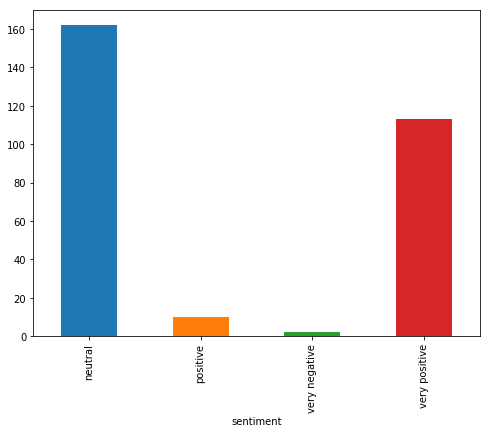

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
mint.groupby("sentiment")["sentiment"].count().plot.bar(ylim=0);
mint.groupby("sentiment")["sentiment"].count()

### Nicht MINT-Studenten

In [13]:
#calculate average of non mint
none_mint = reason_df[reason_df['MINTFach'] == "nein"]
pol_sum_none_mint = none_mint["polarity"].sum()
length = len(none_mint.index)
length
average_none_mint = pol_sum_none_mint / length
average_none_mint

217

0.1141321044546851

sentiment
negative          19
neutral          103
positive          16
very negative     25
very positive     54
Name: sentiment, dtype: int64

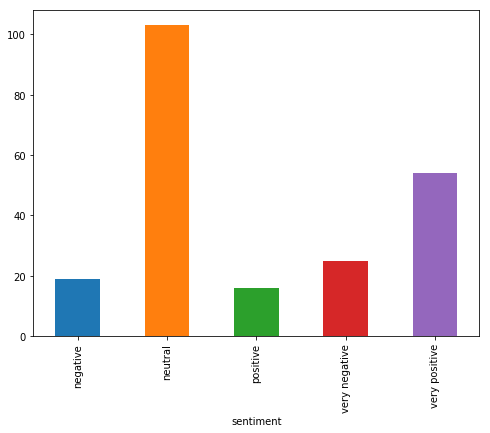

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
none_mint.groupby("sentiment")["sentiment"].count().plot.bar(ylim=0);
none_mint.groupby("sentiment")["sentiment"].count()

# Sentiment Analyse der Verbesserungsvorschläge

## Datenvorbereitung

In [15]:
import sqlite3
import pandas as pd
import os.path

dbPath = "database/bachelor_umfrage.db"

def get_sentiment_suggestion_data(table_name="sentiment"):
    df = pd.DataFrame()
    if os.path.isfile(dbPath):
        conn = sqlite3.connect(dbPath)
        sql = "SELECT MINTFach, Verbesserungsvorschläge FROM " + table_name
        sql += " WHERE Verbesserungsvorschläge IS NOT NULL"
        df = pd.read_sql_query(sql, conn)
    else:
        print("Datenbank oder Tabelle konnte nicht gefunden werden.")
    return df

suggestion_df = get_sentiment_suggestion_data(table_name="sentiment")
suggestion_df.sample(5)

,MINTFach,Verbesserungsvorschläge
76,ja,Die Lehrer an der Schule sollten aufhören den ...
352,nein,Mehr anwendungsbezogen
345,ja,"Es ist natürlich sehr theoretisch, dennoch vie..."
226,ja,Organisation von einem mint tag mit workshops.
132,ja,"Sie werden attraktiver, wenn man den Quotensch..."


## Sentiment Analyse

In [16]:
from textblob_de import TextBlobDE

def get_sentiment_polarity(text):
    blob = TextBlobDE(text)

    for sentence in blob.sentences:
        return sentence.sentiment.polarity

In [17]:
polarity_list = []

for i, row in suggestion_df.iterrows():
    polarity = get_sentiment_polarity(row["Verbesserungsvorschläge"])
    polarity_list.append(polarity)
    
suggestion_df["polarity"] = polarity_list

In [18]:
suggestion_df['sentiment'] = suggestion_df.apply(label_polarity, axis=1)
suggestion_df.sample(5)

,MINTFach,Verbesserungsvorschläge,polarity,sentiment
86,nein,Nicht nur mit guten Job Aussichten werben sond...,1.000000,very positive
234,nein,Allgemein habe ich ich wenig für andere Studie...,0.350000,positive
127,ja,in der Schule besser darauf vorbereiten,0.000000,neutral
229,ja,"Ich fände es super, wenn es mehr Module geben ...",0.466667,positive
211,nein,Nein,0.000000,neutral


Negativster & Positivster Sentiment

In [19]:
suggestion_df[suggestion_df.polarity == suggestion_df.polarity.max()].sample(5)
suggestion_df[suggestion_df.polarity == suggestion_df.polarity.min()].sample(5)

,MINTFach,Verbesserungsvorschläge,polarity,sentiment
44,ja,Jene Fächer attraktiver zu Gestalten sieht mei...,1.0,very positive
157,nein,Man muss die entsprechenden Fächer bereits in ...,1.0,very positive
105,nein,Mehr praktische Erfahrungen sammeln. Zb in Ele...,1.0,very positive
166,nein,"Nein, denn für mich sind diese interessant, i...",1.0,very positive
331,nein,Letztlich sind für mich MINT-Fächer nach wie v...,1.0,very positive


,MINTFach,Verbesserungsvorschläge,polarity,sentiment
48,nein,"Ich finde es schade, dass die Fächer in der Sc...",-1.0,very negative
282,ja,"Auf keinen Fall das Niveau herabsetzen, da hat...",-1.0,very negative
353,ja,Einer der wichtigsten Punkte ist es meiner Mei...,-1.0,very negative
68,ja,Naturwissenschaften dürfen nicht als 'langweil...,-1.0,very negative
272,ja,Besseren Einblick in verschiedene MINT-Studien...,-1.0,very negative


## Visualisierung

### Alle Studenten

In [20]:
#calculate average
polarity_sum = suggestion_df["polarity"].sum()
length = len(reason_df.index)
average = polarity_sum / length
average

0.11119543650793652

sentiment
negative           4
neutral          248
positive          20
very negative     19
very positive     75
Name: sentiment, dtype: int64

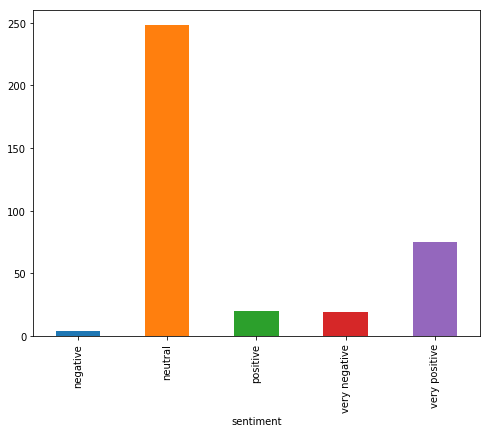

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
suggestion_df.groupby("sentiment")["sentiment"].count().plot.bar(ylim=0);
suggestion_df.groupby("sentiment")["sentiment"].count()

### MINT-Studenten

In [22]:
#calculate average of mint
mint = suggestion_df[suggestion_df['MINTFach'] == "ja"]
pol_sum_mint = mint["polarity"].sum()
length = len(mint.index)
length
average_mint = pol_sum_mint / length
average_mint

212

0.13543632075471698

sentiment
negative           3
neutral          148
positive          10
very negative     11
very positive     40
Name: sentiment, dtype: int64

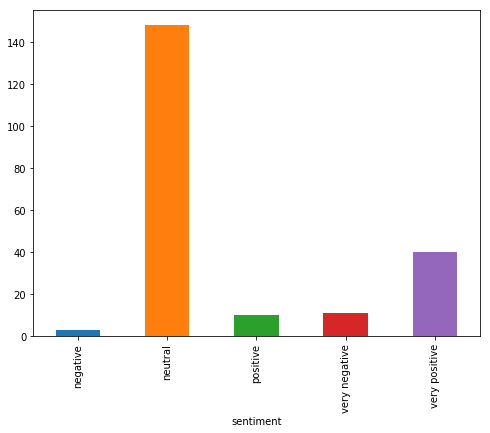

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
mint.groupby("sentiment")["sentiment"].count().plot.bar(ylim=0);
mint.groupby("sentiment")["sentiment"].count()

### Nicht MINT-Studenten

In [26]:
#calculate average of non mint
none_mint = suggestion_df[suggestion_df['MINTFach'] == "nein"]
pol_sum_none_mint = none_mint["polarity"].sum()
length = len(none_mint.index)
length
average_none_mint = pol_sum_none_mint / length
average_none_mint

154

0.17746753246753247

sentiment
negative           1
neutral          100
positive          10
very negative      8
very positive     35
Name: sentiment, dtype: int64

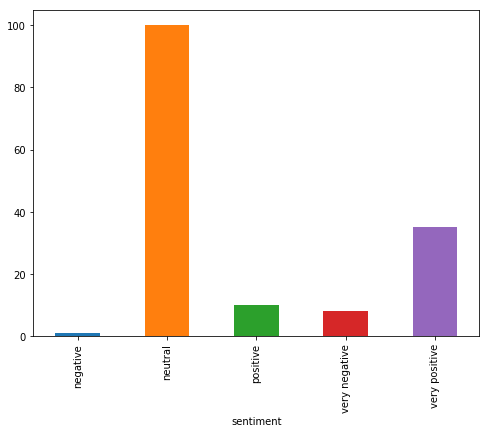

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
none_mint.groupby("sentiment")["sentiment"].count().plot.bar(ylim=0);
none_mint.groupby("sentiment")["sentiment"].count()